## **To plot recipe size distribution and frequency rank distribution plots along with displaying the stats**

***Created by P. Akshay Kumar***

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter
import operator
import pickle

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/recipes.csv")

In [ ]:
top_N_overall=[]
top_N_dict={}
N=10

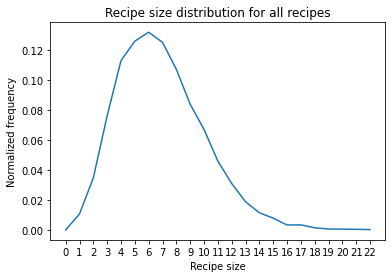

In [ ]:
ingredients_lists=list(df["Lookup Ingredients"])
ingredients=[]
recipe_size_dict={}
recipe_size_dict[0]=0
recipe_count=len(df)
for i,ingredient_list in enumerate(ingredients_lists):
    temp_list=ingredient_list.strip('][').split(', ')
    temp_list=[re.sub("'","",t) for t in temp_list]
    if len(temp_list) not in recipe_size_dict.keys():
        recipe_size_dict.setdefault(len(temp_list),0)
    recipe_size_dict[len(temp_list)]+=1
    for t in temp_list:
        if t is not "":
            ingredients.append(t.strip())

max_recipe_len=max(list(recipe_size_dict.keys()))

for key,val in recipe_size_dict.items(): 
   recipe_size_dict[key]=val/recipe_count
recipe_size_dict=dict(sorted(recipe_size_dict.items()))
dbfile = open('recipe_size_dict_pickle.pkl', 'ab') 
dbfile1 = open('max_recipe_len.pkl', 'ab')    
# source, destination 
pickle.dump(recipe_size_dict, dbfile)
pickle.dump(max_recipe_len, dbfile1)

plt.plot(*zip(*recipe_size_dict.items()))
plt.xticks(range(0,max_recipe_len+1)) 
plt.xlabel('Recipe size')  
plt.ylabel("Normalized frequency")  
plt.title("Recipe size distribution for all recipes")
plt.show()

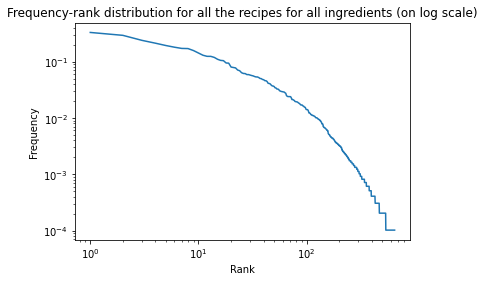

In [ ]:
ingredients_counter_dict=dict(Counter(ingredients))
ingredients_counter_dict=dict(sorted(ingredients_counter_dict.items(), key=operator.itemgetter(1),reverse=True)) 
ingredients_counter_plot_dict={i:v/recipe_count for i,(k,v) in enumerate(ingredients_counter_dict.items(), 1)}

top_N_overall=list(ingredients_counter_dict)[:N]

dbfile2 = open('ingredients_counter_plot_dict.pkl', 'ab')     
# source, destination 
pickle.dump(ingredients_counter_plot_dict, dbfile2)

plt.plot(*zip(*ingredients_counter_plot_dict.items()))
plt.xlabel('Rank')  
plt.ylabel("Frequency")  
plt.xscale('log')
plt.yscale('log')
plt.title("Frequency-rank distribution for all the recipes for all ingredients (on log scale)")
plt.show()

In [ ]:
breakfast_df=df[df["Meal"]=="Breakfast"]
lunch_df=df[df["Meal"]=="Lunch"]
dinner_df=df[df["Meal"]=="Dinner"]

meals_df_dict={}
meals_df_dict["breakfast"]=breakfast_df
meals_df_dict["lunch"]=lunch_df
meals_df_dict["dinner"]=dinner_df

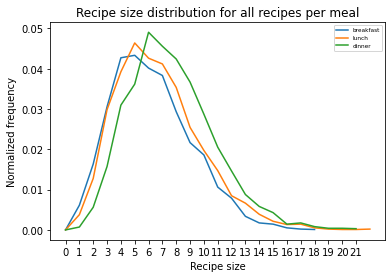

In [ ]:
meals=["breakfast","lunch","dinner"]
meals_ingredients_dict={}
for meal in meals:
    ingredients_lists=list(meals_df_dict[meal]["Lookup Ingredients"])
    ingredients=[]
    recipe_size_dict={}
    recipe_size_dict[0]=0
    recipe_count=len(df)
    for i,ingredient_list in enumerate(ingredients_lists):
        temp_list=ingredient_list.strip('][').split(', ')
        temp_list=[re.sub("'","",t) for t in temp_list]
        if len(temp_list) not in recipe_size_dict.keys():
            recipe_size_dict.setdefault(len(temp_list),0)
        recipe_size_dict[len(temp_list)]+=1
        for t in temp_list:
            if t is not "":
                ingredients.append(t.strip())
                
    meals_ingredients_dict[meal]=ingredients
    max_recipe_len=max(list(recipe_size_dict.keys()))

    for key,val in recipe_size_dict.items(): 
       recipe_size_dict[key]=val/recipe_count
    recipe_size_dict=dict(sorted(recipe_size_dict.items()))

    plt.plot(*zip(*recipe_size_dict.items()))
plt.xticks(range(0,max_recipe_len+1)) 
plt.xlabel('Recipe size')  
plt.ylabel("Normalized frequency") 
plt.legend(meals, loc ="upper right", fontsize='xx-small')  
plt.title("Recipe size distribution for all recipes per meal")
plt.show()

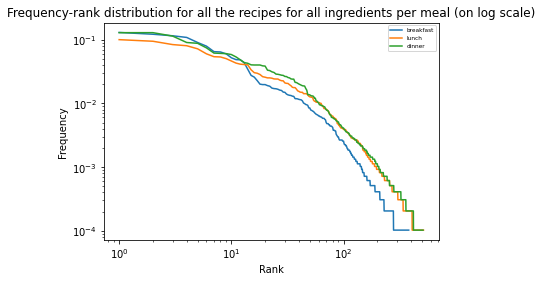

In [ ]:
for meal in meals:
    ingredients_counter_dict=dict(Counter(meals_ingredients_dict[meal]))
    ingredients_counter_dict=dict(sorted(ingredients_counter_dict.items(), key=operator.itemgetter(1),reverse=True)) 
    ingredients_counter_plot_dict={i:v/recipe_count for i,(k,v) in enumerate(ingredients_counter_dict.items(), 1)}

    top_N_dict[meal]=list(ingredients_counter_dict)[:N]
    
    plt.plot(*zip(*ingredients_counter_plot_dict.items()))

plt.xlabel('Rank')  
plt.ylabel("Frequency")  
plt.xscale('log')
plt.yscale('log')
plt.legend(meals, loc ="upper right", fontsize='xx-small') 
plt.title("Frequency-rank distribution for all the recipes for all ingredients per meal (on log scale)")
plt.show()

In [ ]:
dbfile3 = open('top_N_overall.pkl', 'ab')
dbfile4 = open('top_N_dict.pkl', 'ab')    
# source, destination 
pickle.dump(top_N_overall, dbfile3)
pickle.dump(top_N_dict, dbfile4)
top_N = top_N_dict["dinner"]
top_N.remove('black')
top_N.append('black pepper')
print("Top 10 ingredients based on popularity: Overall", top_N_overall)
print("Top 10 ingredients based on popularity: Breakfast", top_N_dict["breakfast"])
print("Top 10 ingredients based on popularity: Lunch", top_N_dict["lunch"])
print("Top 10 ingredients based on popularity: Dinner", top_N)

Top 10 ingredients based on popularity: Overall ['salt', 'oil', 'cheese', 'garlic', 'milk', 'flour', 'red', 'sugar', 'water', 'sauce']
Top 10 ingredients based on popularity: Breakfast ['milk', 'salt', 'flour', 'sugar', 'cinnamon', 'eggs', 'cheese', 'oil', 'soda', 'butter']
Top 10 ingredients based on popularity: Lunch ['oil', 'salt', 'cheese', 'red', 'garlic', 'water', 'tomatoes', 'onions', 'pepper', 'celery']
Top 10 ingredients based on popularity: Dinner ['oil', 'garlic', 'salt', 'cheese', 'sauce', 'red', 'tomatoes', 'pepper', 'chicken', 'black pepper']
